# About Dataset

**Context**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

Inspiration
See my kernel on machine learning basics in R using this dataset, or venture over to the following link for a python based introductory tutorial: https://github.com/ageron/handson-ml/tree/master/datasets/housing

In [1]:
# Linear Regression model on California Housing Dataset

# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Loading the California housing dataset
df = pd.read_csv("../datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Cleaning null values
df.dropna(inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [7]:
X = df.drop(["median_house_value"],axis=1)
y = df["median_house_value"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15324, 9)
(15324,)
(5109, 9)
(5109,)


In [8]:
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

In [9]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2830,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109,INLAND,44600.0
14951,-116.96,32.71,18.0,2413.0,533.0,1129.0,551.0,2.4567,<1H OCEAN,155000.0
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,ISLAND,450000.0
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531,NEAR OCEAN,65700.0
305,-122.18,37.76,43.0,2018.0,408.0,1111.0,367.0,1.8913,NEAR BAY,91200.0


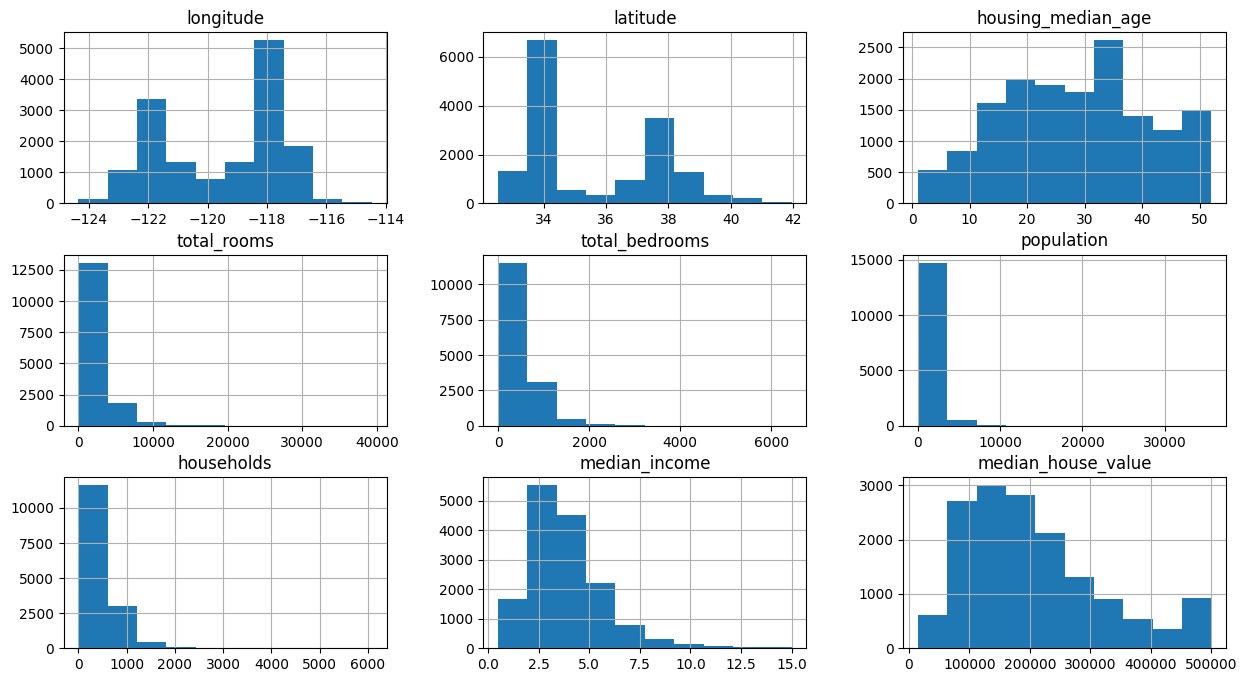

In [10]:
train_data.hist(figsize=(15,8));

In [11]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)

train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]


test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"]+1)
test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)
test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)


test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [12]:
test_data.shape

(5109, 12)

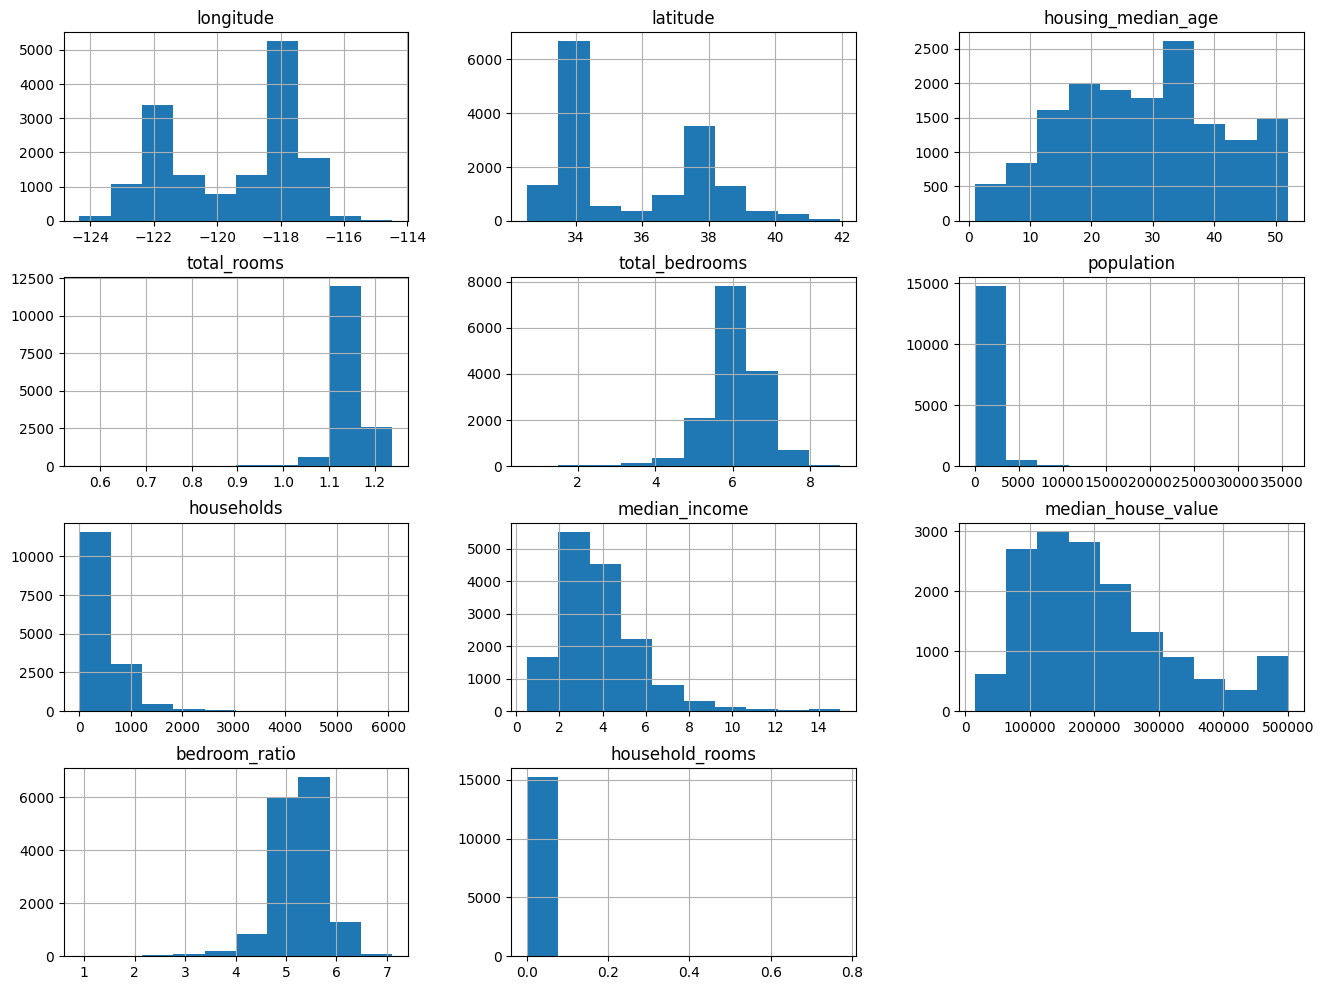

In [13]:
train_data.hist(figsize=(16,12));

<AxesSubplot: >

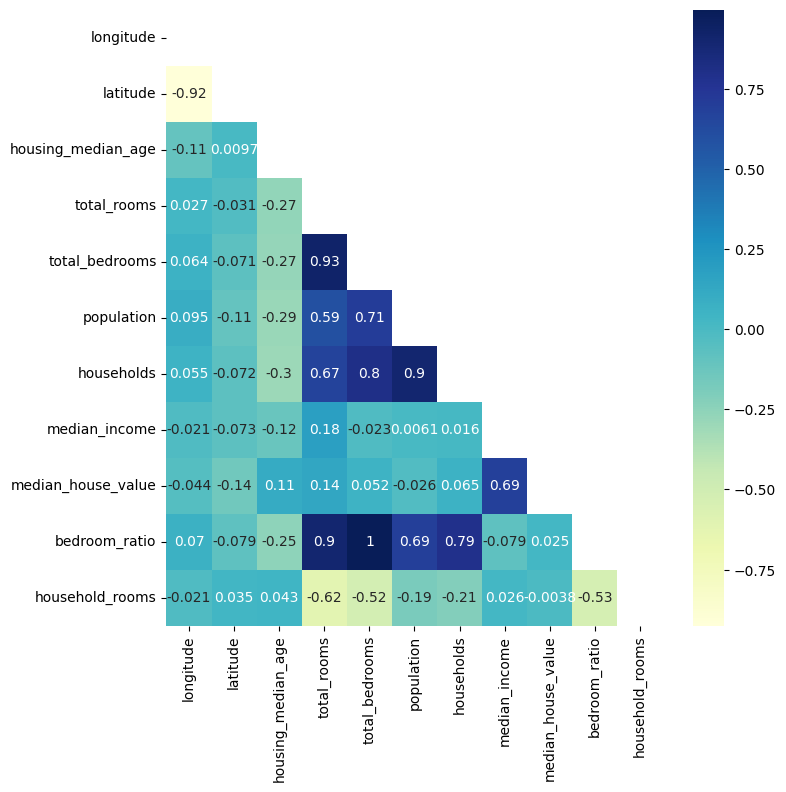

In [14]:
plt.figure(figsize=(8,8))

corr = train_data.corr()

mask = np.triu(corr)

sns.heatmap(corr,cmap="YlGnBu",annot=True,mask=mask)

In [15]:
train_data["ocean_proximity"].value_counts()

<1H OCEAN     6810
INLAND        4796
NEAR OCEAN    1979
NEAR BAY      1736
ISLAND           3
Name: ocean_proximity, dtype: int64

In [16]:
pd.get_dummies(train_data["ocean_proximity"])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2830,0,1,0,0,0
14951,1,0,0,0,0
8314,0,0,1,0,0
14271,0,0,0,0,1
305,0,0,0,1,0
...,...,...,...,...,...
11397,1,0,0,0,0
12081,1,0,0,0,0
5447,1,0,0,0,0
866,0,0,0,1,0


In [17]:
# Create dummy variables to express the categorical variables
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"],drop_first=True,prefix='OP')).drop(["ocean_proximity"],axis=1)
test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"],drop_first=True,prefix='OP')).drop(["ocean_proximity"],axis=1)
print(train_data.shape,test_data.shape)

(15324, 15) (5109, 15)


In [18]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN
2830,-119.01,35.40,11.0,1.196985,7.692113,4781.0,1919.0,1.7109,44600.0,6.426238,0.000624,1,0,0,0
14951,-116.96,32.71,18.0,1.154837,6.280396,1129.0,551.0,2.4567,155000.0,5.438340,0.002096,0,0,0,0
8314,-118.32,33.35,27.0,1.141386,6.257668,744.0,331.0,2.1579,450000.0,5.482518,0.003448,0,1,0,0
14271,-117.12,32.70,38.0,1.112604,5.384495,953.0,231.0,1.0531,65700.0,4.839544,0.004816,0,0,0,1
305,-122.18,37.76,43.0,1.148344,6.013715,1111.0,367.0,1.8913,91200.0,5.236861,0.003129,0,0,1,0


<AxesSubplot: >

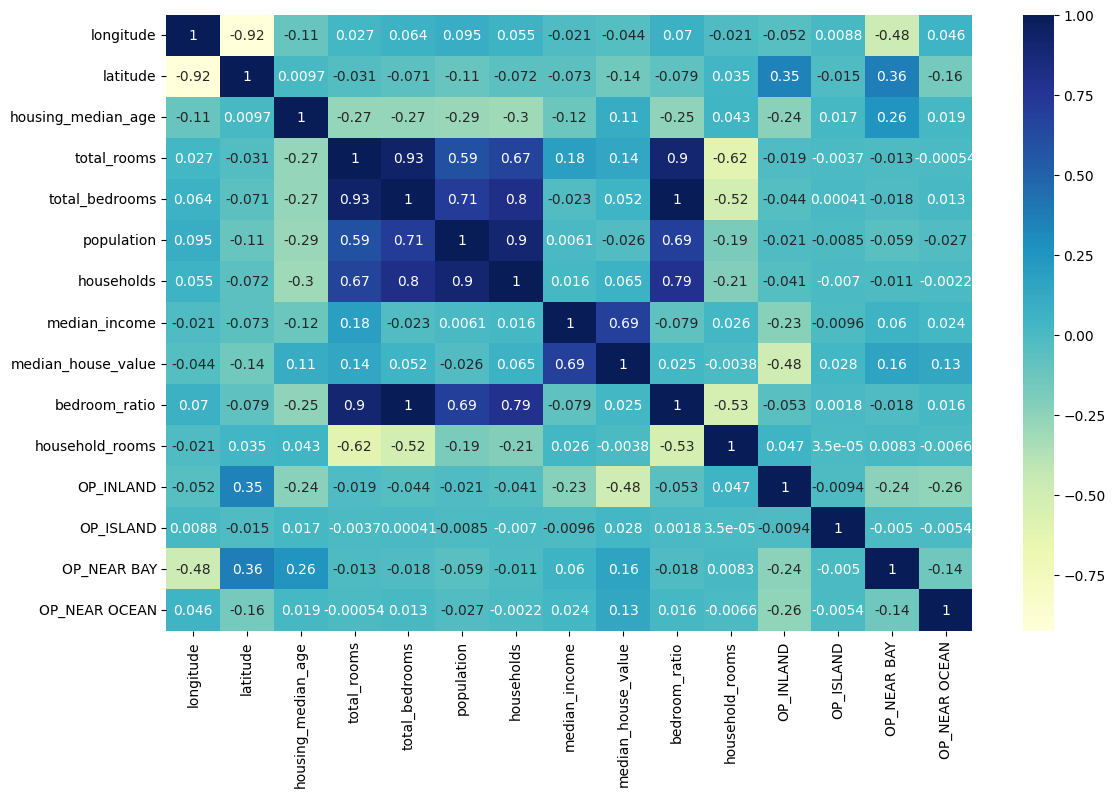

In [19]:
# Create correlation matrix
plt.figure(figsize=(13,8))

corr = train_data.corr()

sns.heatmap(corr,cmap="YlGnBu",annot=True)

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

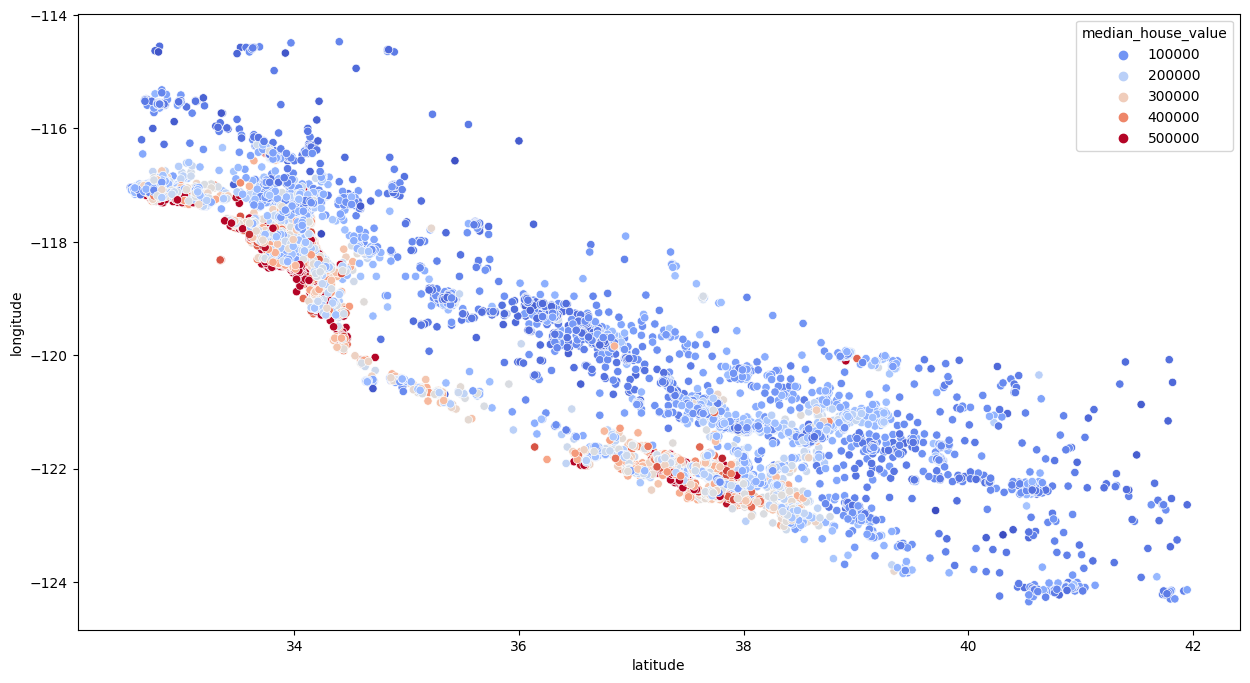

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

## Constructing linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

X_train , y_train = train_data.drop(["median_house_value"],axis=1) , train_data["median_house_value"]
X_test , y_test = test_data.drop(["median_house_value"],axis=1) , test_data["median_house_value"]

# Call the LinearRegression
reg = LinearRegression()

# Fit the model
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
reg.score(X_test,y_test)

0.6590393856178325

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 4612796679.073952
Root Mean Squared Error (RMSE): 67917.57268243581
R-squared (R^2): 0.6590393856178325


## Cross validation

In [25]:
from sklearn.model_selection import KFold,cross_val_score

reg = LinearRegression()
reg.fit(X_train,y_train)

folds = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.64925481, 0.64256861, 0.63473873, 0.66047554, 0.63874708])

In [26]:
cv_score = scores.mean()
print("CV R2 Score : %.3f" % cv_score )

CV R2 Score : 0.645


In [27]:
# can tune other metrics, such as MSE
scores = -cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([4.26788087e+09, 4.86010531e+09, 4.60566340e+09, 5.29385652e+09,
       4.70615677e+09])

In [28]:
cv_score = scores.mean()
print("CV MSE Score : %.3f" % cv_score )

CV MSE Score : 4746732572.558
